In [ ]:
#| default_exp capture

# capture

> Screen Capture.

In [ ]:
#| export
from dialoghelper.core import *
from fastcore.all import *
from fasthtml.common import Div,Script
from httpx import post as xpost
from importlib import resources
from lisette.core import *
import PIL.Image

import base64,json,time

In [ ]:
from IPython.display import display, Image
from io import BytesIO

In [ ]:
#| export
def setup_share():
    "Setup screen sharing"
    iife((resources.files('dialoghelper')/'screenshot.js').read_text())

In [ ]:
setup_share()

In [ ]:
#| export
def start_share(): fire_event('shareScreen')

In [ ]:
start_share()

In [ ]:
#| export
def _capture_screen(timeout=15):
    d = event_get('captureScreen', timeout)
    if 'img_data' in d: return d.img_data
    else: raise Exception(f'Capture failed: {d.error}')

In [ ]:
#| export
def capture_screen(timeout=15):
    "Capture the screen as a PIL image."
    res = _capture_screen()
    data = base64.b64decode(res.split(',')[1])
    return PIL.Image.open(BytesIO(data))

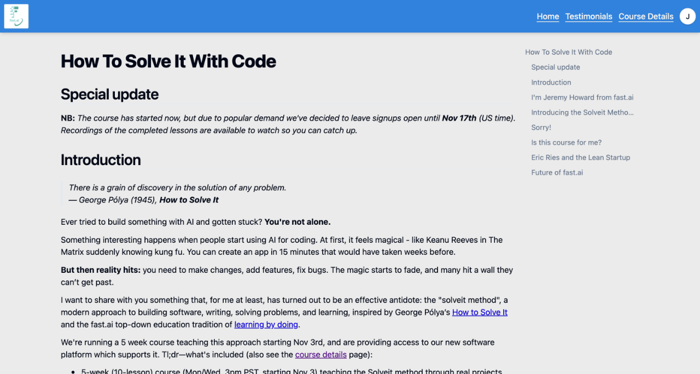

In [ ]:
img = capture_screen()
img.thumbnail((700,700))
img

In [ ]:
#| export
def capture_tool(timeout:int=15):
    "Capture the screen. Re-call this function to get the most recent screenshot, as needed. Use default timeout where possible"
    try: d = _capture_screen(timeout)
    except Exception as e: return f'Capture failed: {e}'
    return ToolResponse([{'type': 'image_url', 'image_url': d}])

Please view my screen with &`capture_tool` and describe briefly what you see.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->



<details class='tool-usage-details'>

```json
{
  "id": "toolu_01Aqr48jBMZkvMzyBK94qhAt",
  "call": {
    "function": "capture_tool",
    "arguments": {}
  },
  "result": "[{'type': 'image_url', 'image_url': 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABQAAAAKsCAYAAACzn<TRUNCATED>"
}
```

</details>

I can see a webpage for "How To Solve It With Code" - a course by Jeremy Howard. The page shows a special update noting that signups are open until Nov 17th, and includes an introduction section with a George Pólya quote about problem-solving. The page discusses using AI for coding and introduces the "solveit method" inspired by Pólya's work and fast.ai's learning-by-doing approach. There's a navigation menu on the right showing various course sections.

## export -

In [ ]:
#|hide
from nbdev import nbdev_export
nbdev_export()